# Tarea PANDAS 
## Juliana Paola Andrade Rodriguez 
### 2210722
40-Fisica  
juliana2210722@correo.uis.edu.co

In [1]:
#se importan las librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit 

 Cargando los datos

In [2]:
act_power=pd.read_csv('Global_active_power.csv')
intensity=pd.read_csv('Global_intensity.csv')
reac_power=pd.read_csv('Global_reactive_power.csv')
voltage=pd.read_csv('Voltage.csv')

Conectamos los 4 archivos

In [3]:
combinado=pd.merge(act_power,intensity)
Combinado1=pd.merge(combinado, reac_power)
Combinado2=pd.merge(Combinado1, voltage)

In [4]:
Combinado2

,Datetime,Global_active_power,Global_intensity,Global_reactive_power,Voltage
0,2010-01-01 00:00:00,1.790,7.4,0.236,240.65
1,2010-01-01 00:01:00,1.780,7.4,0.234,240.07
2,2010-01-01 00:02:00,1.780,7.4,0.234,240.15
3,2010-01-01 00:03:00,1.746,7.2,0.186,240.26
4,2010-01-01 00:04:00,1.686,7.0,0.102,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.946,4.0,0.000,240.43
457391,2010-11-26 20:59:00,0.944,4.0,0.000,240.00
457392,2010-11-26 21:00:00,0.938,3.8,0.000,239.82
457393,2010-11-26 21:01:00,0.934,3.8,0.000,239.70


Agrupando los datos por dias

In [5]:
Combinado2.index=pd.DatetimeIndex(Combinado2.Datetime)
Combinado2_diario=Combinado2.resample('1D').mean()
Combinado2_diario

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,
2010-01-01,0.850175,3.537083,0.114817,242.565722
2010-01-02,1.176235,4.857778,0.086656,243.631743
2010-01-03,0.901894,3.757778,0.090331,241.822778
2010-01-04,1.171833,4.879028,0.100322,241.754160
2010-01-05,0.916776,3.929861,0.133697,240.647167
...,...,...,...,...
2010-12-07,0.770538,3.397222,0.198550,240.218646
2010-12-08,0.367846,1.623750,0.117429,240.794931
2010-12-09,1.119508,4.755694,0.139832,241.619722


Agrupando los datos por meses

In [6]:
Combinado2_mes=Combinado2.resample('M').mean()
Combinado2_mes

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,
2010-01-31,1.300640,5.430332,0.125182,242.338522
2010-02-28,1.157539,4.836624,0.109467,242.002101
2010-03-31,1.170015,4.920399,0.136368,241.475284
2010-04-30,1.036334,4.363496,0.129557,241.442527
2010-05-31,1.075957,4.551504,0.127221,241.296151
2010-06-30,0.975306,4.170282,0.145525,240.888985
2010-07-31,0.778947,3.337202,0.138093,240.965167
2010-08-31,0.929452,3.954423,0.130815,241.422944
2010-09-30,0.997541,4.223837,0.127700,241.267517


In [7]:
Combinado2_diario = Combinado2_diario.dropna()
Combinado2_mes = Combinado2_mes.dropna()#eliminar espacios vacios

Regresión lineal

In [8]:
#Función para las dos primeras regresiones 
def funcion1(x, a, b):  
    return a * x + b
#Funcion para la ultima regresion
def funcion2(x, a, b,c):  
    return a * x[0] + b * x[1] + c

#### 1. Relación 1: Global_active_power = A1(Global_intensity) + B1

In [9]:
def get_fit2(func,xdata,ydata,labelx,labely,r,title):
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(pcov,r)
    E=np.sqrt(np.mean((ydata-func(xdata, *popt))**2))
    
    plt.figure(figsize=(6,6))
    plt.xlabel(labelx)
    plt.ylabel(labely) 
    plt.title(title)
    plt.plot(xdata,ydata, ls='None', marker = '.', label = 'Original')
    plt.plot(xdata,funcion1(xdata, *popt),'r-', label = 'fit: $A_1$=%5.3f, $B_1$=%5.3f' % tuple(popt))
    plt.legend()
    plt.show()

    
    
    print("Los coeficientes son : {}".format(popt))
    print("Error on fit is ={}".format(E))
    #return popt, pcov 

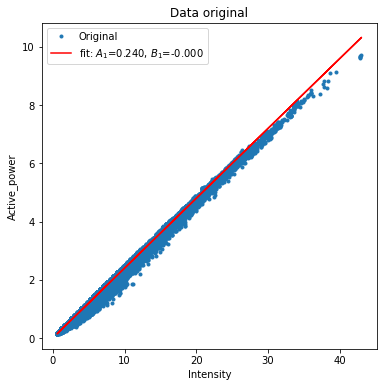

Los coeficientes son : [ 0.24 -0.  ]
Error on fit is =0.05173763748702566


In [10]:
get_fit2(funcion1,Combinado2.Global_intensity,Combinado2.Global_active_power,"Intensity","Active_power",2,"Data original")

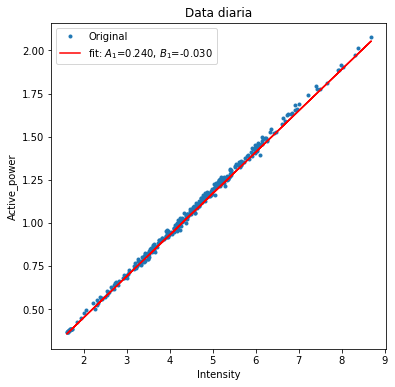

Los coeficientes son : [ 0.24 -0.03]
Error on fit is =0.022630442847155905


In [11]:
get_fit2(funcion1,Combinado2_diario.Global_intensity,Combinado2_diario.Global_active_power,"Intensity","Active_power",2, "Data diaria")

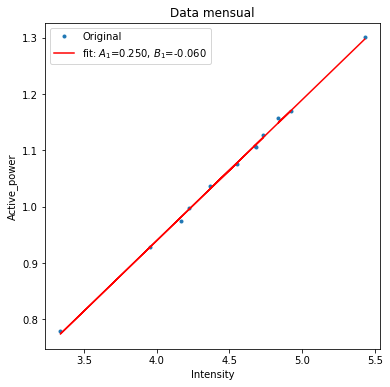

Los coeficientes son : [ 0.25 -0.06]
Error on fit is =0.004316919789440401


In [19]:
get_fit2(funcion1,Combinado2_mes.Global_intensity,Combinado2_mes.Global_active_power,"Intensity","Active_power",2, "Data mensual")

#### 2. Relación 2: Global_active_power = A2(Voltage) + B2

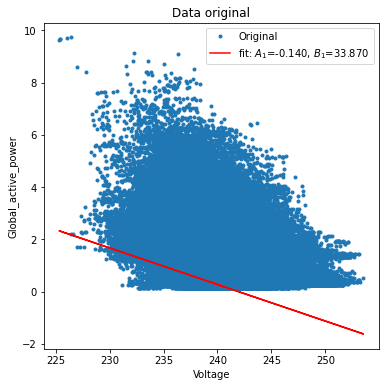

Los coeficientes son : [-0.14 33.87]
Error on fit is =1.3141359640011343


In [13]:
get_fit2(funcion1,Combinado2.Voltage,Combinado2.Global_active_power,"Voltage","Active_power",2, "Data original")

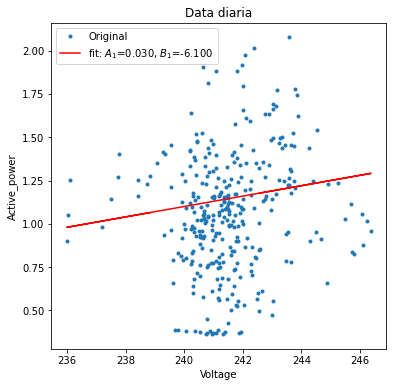

Los coeficientes son : [ 0.03 -6.1 ]
Error on fit is =0.35140059805874996


In [14]:
get_fit2(funcion1,Combinado2_diario.Voltage,Combinado2_diario.Global_active_power,"Voltage","Active_power",2, "Data diaria")

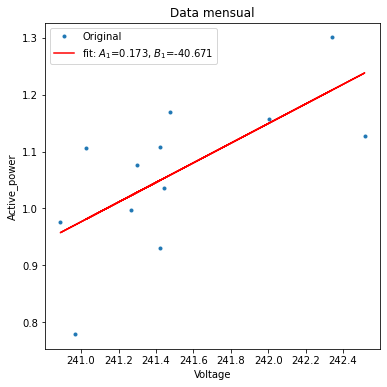

Los coeficientes son : [  0.17281052 -40.67097826]
Error on fit is =0.09452198916921863


In [15]:
get_fit2(funcion1,Combinado2_mes.Voltage,Combinado2_mes.Global_active_power,"Voltage","Active_power",10, "Data mensual")

### 3. Relacion 3: Global active power = A31(Global intensity) + A32(Voltaje) + B3.

In [20]:
def get_fit(func,xdata,ydata,labelx,labely,r, title):
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(pcov,r)
    E=np.sqrt(np.mean((ydata-func(xdata, *popt))**2))
    
    x = (np.linspace(xdata[0].min(), xdata[0].max(), 100), (np.linspace(xdata[1].min(), xdata[1].max(), 100)))
    plt.figure(figsize=(6,6))
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)
    plt.plot(xdata[0]+xdata[1],ydata, ls='None', marker = '.', label = 'Original')
    plt.plot(x[1]+x[0],x[0]*popt[0]+ x[1]*popt[1] + popt[2] ,'r-', label = 'Fit: $A{32}=$' + str(round(popt[0],3)) + ',$A{32}=$' + str(round(popt[1],3)) + ',$B_3=$' + str(round(popt[2],3))) 
    plt.legend()
    plt.show()
    
    print("Los coeficientes son : {}".format(popt))
    print("Error on fit is ={}".format(E))
    #return popt, pcov 

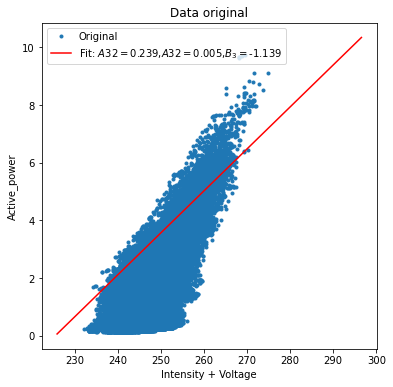

Los coeficientes son : [ 0.23947996  0.00466923 -1.13918528]
Error on fit is =0.04776192256518251


In [21]:
get_fit(funcion2,[Combinado2.Global_intensity, Combinado2.Voltage], Combinado2.Global_active_power, 'Intensity + Voltage', 'Active_power',10, "Data original")

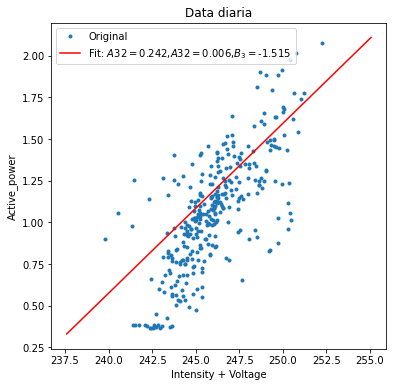

Los coeficientes son : [ 0.24235044  0.00617299 -1.51527187]
Error on fit is =0.011938888071503765


In [22]:
get_fit(funcion2,[Combinado2_diario.Global_intensity, Combinado2_diario.Voltage], Combinado2_diario.Global_active_power, 'Intensity + Voltage', 'Active_power',10, "Data diaria")

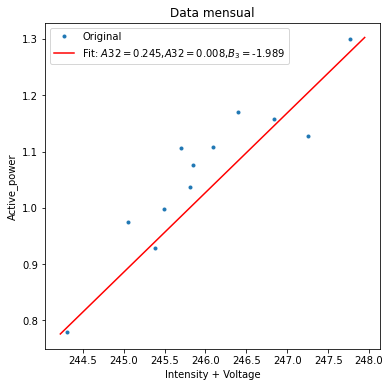

Los coeficientes son : [ 0.24524991  0.00808133 -1.98910306]
Error on fit is =0.002788071357105688


In [23]:
get_fit(funcion2,[Combinado2_mes.Global_intensity, Combinado2_mes.Voltage], Combinado2_mes.Global_active_power, 'Intensity + Voltage', 'Active_power',10, "Data mensual")

## Conclusiones

- La relacion 3 de intensity + Voltage vs active_power es la mejor relacion, ya que su error es de 0.0477, 0.0119, 0.0027 en el fit.
- La relacion 2 de Voltage vs active_power es la peor relacion, ya que su error es de 1.3141, 0.3514, 0.0945 en el fit.
- El error es menor con el resample en meses, seguido del de días y por último el original (en minutos).